#  Cleaning the Dataset

In [404]:
import pandas as pd
import numpy as np

path='./data_sets/SampleData.csv'
df=pd.read_csv(path,encoding='cp1252')

/home/arnau/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,44,53,77,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [405]:
df.shape 

(9240, 122)

We have 122 columns!!

In [406]:
col_names = df.columns.tolist()

print("Column names:")
print(col_names)

Column names:
['Prospect ID', 'Lead Number', 'Company', 'Lead Origin', 'Mobile Number', 'Website', 'Time Zone', 'Job Title', 'Lead Source', 'Source Medium', 'Notes', 'Source Campaign', 'Source Content', 'Do Not Email', 'Do Not Call', 'Lead Stage', 'Lead Grade', 'Lead Score', 'Order Value', 'Engagement Score', 'TotalVisits', 'Page Views Per Visit', 'Average Time Per Visit', 'Last Activity', 'Last Activity Date', 'Related Landing Page Id', 'First Landing Page Submission Id', 'First Landing Page Submission Date', 'Created On', 'Modified On', 'Lead Conversion Date', 'Address 1', 'Address 2', 'Cityold', 'State', 'Country', 'Zip', 'Facebook URL', 'Twitter URL', 'LinkedIn URL', 'Industry', 'Work Area', 'Course Interested', 'Keyword', 'Date', 'Specialization', 'Entrance Test', 'How did you hear about SomeSchool', 'What is your current occupation', 'If you are a working professional', 'If you are a working professional please mention ', 'What matters most to you in choosing an ADP', 'Age', 'Nex

In [407]:
df = df.replace(': ',np.nan)
df = df.replace('Select ',np.nan)



In [408]:
df.head()

,Prospect ID,Lead Number,Company,Lead Origin,Mobile Number,Website,Time Zone,Job Title,Lead Source,Source Medium,...,Stage Rotting Flag Level,Mailing Preferences,Twitter Id,Facebook Id,LinkedIn Id,Skype Id,Gtalk Id,Google Plus Id,Quality Score 01,Groups
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,NaN,API,NaN,NaN,NaN,NaN,Olark Chat,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,NaN,API,NaN,NaN,NaN,NaN,Organic Search,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Direct Traffic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Direct Traffic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3256f628-e534-4826-9d63-4a8b88782852,660681,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Google,CPC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can drop first the columns that we know by previous knowladge that they are useless. (feel free to delete them if you thing that they may be useful)

In [409]:
drop_columns=['Mobile Number','Prospect ID', 'Lead Number', 'Time Zone',
 'Address 1', 'Address 2',  'Facebook URL', 'Twitter URL', 'LinkedIn URL', 'Date', 
'Admission Number', 'Photo Url', 'Twitter Id', 'Facebook Id', 'LinkedIn Id', 'Skype Id', 
 'Gtalk Id', 'Google Plus Id', 'Groups']

df= df.drop(drop_columns,axis=1)
df.shape 

(9240, 103)

Misteri: What the following columns mean? Are they useful? 

'Stage Rotting Flag Status', 
 'Stage Rotting Flag Message', 'Stage Rotting Flag Modification Date', 'Stage Rotting Flag Additional Info',
 'Stage Rotting Flag Level',

Let us check how many different values do we have for each feature.

In [410]:
feature='Do Not Email'
print ('There are ' +str(np.unique(df[feature]).shape[0]) +' unique values for this feature.')

There are 2 unique values for this feature.


In [411]:
col_names = df.columns.tolist()
col_BooleanFeatures=[]
to_drop=[]
potentialOnehot=[]
col_problems=[]
print('Unique values for each feature')
for i in col_names:
    try:
        x=np.unique(df[i]).shape[0]  
        print (i, x) 
        if(x==2):
            col_BooleanFeatures.append(i)  
        if(x==1):
            to_drop.append(i)
        if(x>2 and x<30):
            potentialOnehot.append(i)
    except: # some characters like < - , make np.unique fail. FIGURE OUT how to solve it!
        col_problems.append(i)

Unique values for each feature
Lead Origin 5
Do Not Email 2
Do Not Call 2
Lead Stage 9
Lead Score 187
Order Value 9240
Engagement Score 30
TotalVisits 178
Page Views Per Visit 251
Average Time Per Visit 2902
Created On 8651
Modified On 4490
Zip 9224
Industry 9240
Work Area 9240
Keyword 9240
Search 2
Magazine 1
Newspaper Article 2
Welearn Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Update me on Supply Chain Content 1
Get updates on PGDMHBSCM 1
amt 9208
Enquiry Type 9240
Asymmetrique Activity Score 4230
Asymmetrique Profile Score 4228
I agree to pay the amount through cheque 1
a free copy of Mastering The Interview 2
Landing Page 9240
Asymmetrique Scoring Model 4219
Last Notable Activity 16
Last Notable Activity Date 4941
Stage Rotting Flag Status 9240
Stage Rotting Flag Message 9240
Stage Rotting Flag Modification Date 9240
Stage Rotting Flag Additional Info 9240
Stage Rotting Flag Level 9240
Mailing Preferences 9240
Qu

We drop the features with only one value. 

In [412]:
df= df.drop(to_drop,axis=1)

Change Yes/No by 1/0

In [413]:
df[col_BooleanFeatures].head()


,Do Not Email,Do Not Call,Search,Newspaper Article,Welearn Forums,Newspaper,Digital Advertisement,Through Recommendations,a free copy of Mastering The Interview
0,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No


In [414]:
df[col_BooleanFeatures]= np.where(df[col_BooleanFeatures]=='Yes',1.,0.)


In [415]:
df[col_BooleanFeatures].head()

,Do Not Email,Do Not Call,Search,Newspaper Article,Welearn Forums,Newspaper,Digital Advertisement,Through Recommendations,a free copy of Mastering The Interview
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## One-hot encoding

In [416]:
df[potentialOnehot].head()

,Lead Origin,Lead Stage,Last Notable Activity
0,API,Not Interested,Modified
1,API,Unreachable,Email Opened
2,Landing Page Submission,Qualified,Email Opened
3,Landing Page Submission,Unreachable,Modified
4,Landing Page Submission,Qualified,Modified


In [417]:
c=['Lead Origin','Last Notable Activity']
dummies = pd.get_dummies(df[c])
df[dummies.columns]=dummies
df= df.drop(c,axis=1)


In [418]:
df[col_problems].columns


Index(['Company', 'Website', 'Job Title', 'Lead Source', 'Source Medium',
       'Notes', 'Source Campaign', 'Source Content', 'Lead Grade',
       'Last Activity', 'Last Activity Date', 'Related Landing Page Id',
       'First Landing Page Submission Id',
       'First Landing Page Submission Date', 'Lead Conversion Date', 'Cityold',
       'State', 'Country', 'Course Interested', 'Specialization',
       'Entrance Test', 'How did you hear about SomeSchool',
       'What is your current occupation', 'If you are a working professional',
       'If you are a working professional please mention ',
       'What matters most to you in choosing an ADP', 'Age', 'Next Follow Up',
       'Any other Please specify', 'Last Degree', 'Tags', 'Lead Quality',
       'Chat Group', 'Lead Profile', 'City New', 'Country New', 'Industry New',
       'Profile Score', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'ecode', 'eventname', 'Admission Date',
       'Previous Stage', 'Number

We still have to clean the columns  col_problems

In [419]:
i='Company'
#df[i]
#np.unique(df[i]).shape[0]  
for x in df[i]:
    try:
        np.isnan(x)
    except:
        print(x)

Dr. Ram Manohar Lohia Avadh University /ugc
vinod.shah1@gmail.com
poona university
mumbai university
Yogeshsadarang@yahoo.in
mumbai university
duplicate lead
mumbai university
mumbai university
mumbai university
shobit university meerut
vinoba bhave university
robbinpandita100@gmail.com
amity university
vkaradkar@in.imshealth.com
mumbai university
rakshata.nikam@sharekhan.com
smart.ashwin@yahoo.com
N.A.
nehamenon26@rediffmail.com
mumbai university
lateral student
9909902397
Looking for Friend Sanjay
mumbai university
sankpal1pooja@gmail.com
mumbai university
sndt university
vidula2211@gmail.com
manish.chand97@Yahoo.com
mumbai university
gorakhpur university
duplicate lead
For Daughter
rombo@mai.com
mumbai university
sikkim manipal university
lateral 2015
ycmou
north Maharashtra university
west bengal university
Approved by AICTE, Ministry of HRD, Government of India
nidhisingh9029291638@gmail.com
9823685110
mumbai university
9830854626
mumbai university
ycmou
poona university
poona uni

# Missing Data

It seems, there are a lot of missing values. Let us check the amount of `NaN`, both column-wise and row-wise.

We first need to convert all the elements into values.

In [420]:
df.values

array([[nan, nan, nan, ..., 0, 0, 0],
       [nan, nan, nan, ..., 0, 0, 0],
       [nan, nan, nan, ..., 0, 0, 0],
       ..., 
       [nan, nan, nan, ..., 0, 0, 0],
       [nan, nan, nan, ..., 0, 0, 0],
       [nan, nan, nan, ..., 0, 0, 0]], dtype=object)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

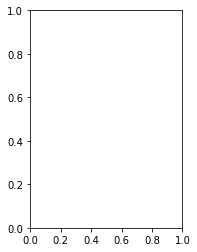

In [421]:
%matplotlib inline
import matplotlib.pyplot as plt

v=np.array(df.values)

fig = plt.figure()
sf1 = plt.subplot(1,2,1)
year_nan = np.sum(np.where(np.isnan(v),1.,0.),axis=0)
plt.bar(np.array(range(year_nan.shape[0])),year_nan)
plt.subplot(1,2,2)
concept_nan = np.sum(np.where(np.isnan(v),1.,0.),axis=1)
plt.bar(np.array(range(concept_nan.shape[0])),concept_nan)

fig.set_size_inches((12,4))

## Spliting the Data Set

Let us deal with the feature we want to predict "Lead Stage".

In [422]:
#df=pd.read_csv(path,encoding='cp1252')
y=df['Lead Stage']
df=df.drop('Lead Stage',axis=1)
print(y.shape)
print(df.shape)


(9240,)
(9240, 116)


In [423]:
print ('There are ' +str(np.unique(y).shape[0]) +' unique values for this feature.')
print(np.unique(y))

There are 9 unique values for this feature.
['Closed' 'Interested' 'Junk Lead' 'Lost' 'Not Called' 'Not Eligible'
 'Not Interested' 'Qualified' 'Unreachable']


Our model will have only 3 possibles outcomes: Closed, Interested and not interested. We will use the values 2,1,0 to represent it.

In our DataSet we also have Junk Lead and Lost values which are not interesing outcomes.

Debat: Intentar predir altres outcomes o simplement eliminar aquesta part de les dades?

In [424]:
sum_lost= sum(np.where(y=='Lost',1.,0.))
sum_junk=sum(np.where(y=='Junk Lead',1.,0.))
sum_elige=sum(np.where(y=='Not Eligible',1.,0.))
sum_called=sum(np.where(y=='Not Called',1.,0.))
print(sum_lost,sum_junk,sum_elige,sum_called)

29.0 1686.0 293.0 9.0


Apparently we can get read of Lost  and Not Called(there is a small portion of it) but  we should think what to do with Junk.

Here there isa proposal of what to do:

In [425]:
i=0

for x in y:
    if(x=='Lost' or x=='Junk Lead' or x=='Not Called' or x=='Not eligible'):
        y=y.drop(i,axis=0)
        df=df.drop(i,axis=0)
    if(x=='Closed'):
        y[i]=2
    if(x=='Interested' or x=='Qualified' ):
        y[i]=1
    if(x=='Not Interested' or x== 'Unreachable'):
        y[i]=0
    i+=1


/home/arnau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/arnau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [428]:
print(len(y))
y.head()
print(df.shape)

7516
(7516, 116)


In [429]:
from sklearn import model_selection


X_train,X_test,y_train,y_test = model_selection.train_test_split(df.values,y,train_size=0.75,random_state=42)